### Data load

In [8]:
c = '''0.998	0.999	0.999	0.998	0.999	0.999	0.998	0.959	0.997	0.93	0.961	0.993	1	0.487	0.983	1.000 	1.000 	1.000 	1	1	1
0.948	0.613	0.882	0.869	0.606	0.901	0.95	0.158	0.751	0.694	0.195	0.708	0.778	0.204	0.71	0.991 	0.958 	0.986 	0.99	0.886	0.952
0.92	0.398	0.963	0.905	0.398	0.952	0.998	0.376	0.95	0.47	0.296	0.915	0.905	0.337	0.901	0.999 	0.983 	0.998 	0.998	0.972	0.989
0.967	0.799	0.981	0.965	0.8	0.981	0.989	0.779	0.987	0.956	0.805	0.97	0.966	0.75	0.969	1.000 	0.987 	0.999 	0.995	0.988	0.995
0.963	0.479	0.885	0.957	0.474	0.883	0.996	0.426	0.891	0.702	0.282	0.785	0.848	0.28	0.849	0.983 	0.972 	0.989 	0.987	0.941	0.989
0.887	0.662	0.872	0.904	0.68	0.88	0.945	0.66	0.973	0.978	0.751	0.87	0.654	0.537	0.807	0.970 	0.994 	0.999 	0.953	0.943	0.995
0.957	0.18	0.941	0.945	0.18	0.943	0.971	0.06	0.932	0.554	0.097	0.826	0.845	0.038	0.892	0.984 	0.913 	0.983 	0.914	0.854	0.953
0.997	0.466	0.948	0.691	0.158	0.84	0.997	0.463	0.976	0.694	0.141	0.915	0.992	0.004	0.96	0.696 	0.685 	0.897 	1	0.609	0.862
0.422	0.217	0.75	0.405	0.205	0.745	0.358	0.176	0.77	0.186	0.125	0.684	0.152	0.113	0.714	0.298 	0.422 	0.926 	0.998	0.731	0.969
0.885	0.75	0.972	0.773	0.54	0.876	0.96	0.253	0.924	0.795	0.436	0.822	0.921	0.245	0.921	0.953 	0.627 	0.923 	0.971	0.787	0.953
0.901	0.375	0.749	0.893	0.368	0.744	1	0.261	0.871	0.833	0.677	0.85	0.639	0.154	0.811	0.998 	0.988 	0.998 	0.92	0.914	0.961
1	0.978	0.996	1	0.978	0.996	1	0.984	0.996	1	0.972	0.995	1	0.978	0.996	1.000 	1.000 	1.000 	1	0.978	0.996
0.789	0.594	0.919	0.547	0.729	0.965	1	0.287	0.948	0.802	0.928	0.96	0.556	0.378	0.951	0.753 	0.805 	0.983 	1	0.976	0.989
0.224	0.105	0.693	0.249	0.034	0.718	0.492	0.112	0.937	0.315	0.071	0.724	0.256	0	0.685	1.000 	0.977 	0.991 	1	0.982	0.995
0.814	0.392	0.896	0.765	0.284	0.835	0.949	0.383	0.902	0.759	0.359	0.843	0.779	0.057	0.819	0.805 	0.562 	0.892 	0.831	0.528	0.879
0.845	0.534	0.896	0.791	0.495	0.884	0.907	0.422	0.92	0.711	0.473	0.857	0.752	0.304	0.864	0.895 	0.858 	0.971 	0.97	0.873	0.965'''





# count baseline num


num = int(len(c.split('\n')[0].split('\t')) / 3)


GA, PA, NED = [], [], []


for i in range(num):


    GA.append([])


    PA.append([])


    NED.append([])





lines = c.split('\n')


for line in lines:


    num_list = line.split('\t')


    for i in range(num):


        GA[i].append(float(num_list[i*3]))


        PA[i].append(float(num_list[i*3 + 1]))


        NED[i].append(float(num_list[i*3 + 2]))

### Draw

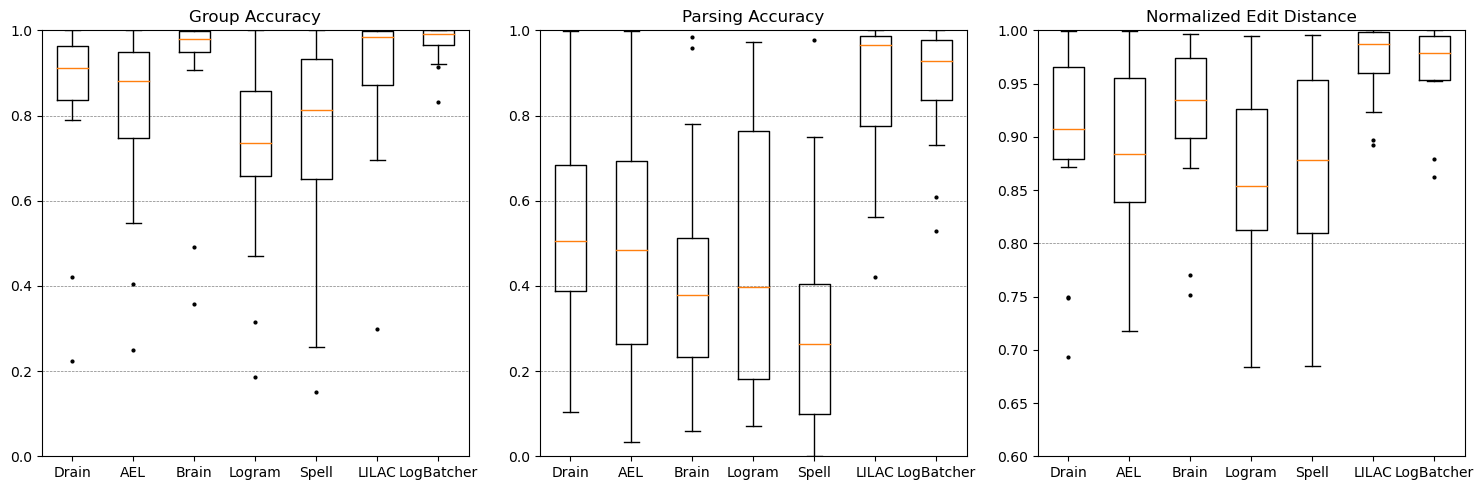

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    'Log Parser': ['Drain', 'AEL', 'Brain', 'Logram', 'Spell', 'LILAC', 'LogBatcher'],
    'Group Accuracy': GA,
    'Parsing Accuracy': PA,
    'Normalized Edit Distance': NED
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)
flierprops = dict(marker='o', color='black', markersize=2,
                  markerfacecolor='black', markeredgecolor='black')
# 绘制箱线图
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax in axs:
    ax.axhline(y=0.2, color='gray', linestyle='--', linewidth=0.5)
    ax.axhline(y=0.4, color='gray', linestyle='--', linewidth=0.5)
    ax.axhline(y=0.6, color='gray', linestyle='--', linewidth=0.5)
    ax.axhline(y=0.8, color='gray', linestyle='--', linewidth=0.5)
    ax.axhline(y=1.0, color='gray', linestyle='--', linewidth=0.5)

# Group Accuracy
axs[0].boxplot(df['Group Accuracy'], labels=df['Log Parser'],
               flierprops=flierprops)
axs[0].set_title('Group Accuracy')
axs[0].set_ylim(0, 1)

# Parsing Accuracy
axs[1].boxplot(df['Parsing Accuracy'],
               labels=df['Log Parser'], flierprops=flierprops)
axs[1].set_title('Parsing Accuracy')
axs[1].set_ylim(0, 1)

# Edit Distance
axs[2].boxplot(df['Normalized Edit Distance'],
               labels=df['Log Parser'], flierprops=flierprops)
axs[2].set_title('Normalized Edit Distance')
axs[2].set_ylim(0.6, 1)

plt.tight_layout()
plt.show()

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
data = {
    'Log Parser': ['Drain', 'AEL', 'Brain', 'Logram', 'Spell', 'LILAC', 'LogBatcher'],
    'Group Accuracy': GA,
    'Parsing Accuracy': PA,
    'Normalized Edit Distance': NED
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)
flierprops = dict(marker='o', color='black', markersize=1)
 
with PdfPages('test.pdf') as pdf:
    fig, axs = plt.subplots(1, 7, figsize=(15, 2))

    metrics = ['GA', 'PA', 'NED']
    boxplot_data = []
    for i, parser in enumerate(df['Log Parser']):
        parser_data = [df['Group Accuracy'][i], df['Parsing Accuracy'][i], df['Normalized Edit Distance'][i]]
        
        
        bp = axs[i].boxplot(parser_data, labels=metrics, flierprops=flierprops)
        axs[i].set_title(f'{parser}')
        axs[i].set_ylim(0, 1)
        axs[i].axhline(y=0.2, color='gray', linestyle='--', linewidth=0.5)
        axs[i].axhline(y=0.4, color='gray', linestyle='--', linewidth=0.5)
        axs[i].axhline(y=0.6, color='gray', linestyle='--', linewidth=0.5)
        axs[i].axhline(y=0.8, color='gray', linestyle='--', linewidth=0.5)
        axs[i].axhline(y=1.0, color='gray', linestyle='--', linewidth=0.5)
        # 获取箱线图的统计数据
        for j, metric in enumerate(metrics):
            stats = {
                'Log Parser': parser,
                'Metric': metric,
                'Q1': bp['boxes'][j].get_ydata()[0],
                'Median': bp['medians'][j].get_ydata()[0],
                'Q3': bp['boxes'][j].get_ydata()[2],
                'Whisker_low': bp['whiskers'][2*j].get_ydata()[1],
                'Whisker_high': bp['whiskers'][2*j+1].get_ydata()[1],
                'Mean': np.mean(parser_data[j])
            }
            boxplot_data.append(stats)
    plt.tight_layout()
    pdf.savefig(fig)  # 保存当前图像到PDF文件
    plt.close()

# 打印箱线图统计数据
for item in boxplot_data:
    print(item)

{'Log Parser': 'Drain', 'Metric': 'GA', 'Q1': 0.8372499999999999, 'Median': 0.9105000000000001, 'Q3': 0.964, 'Whisker_low': 0.789, 'Whisker_high': 1.0, 'Mean': 0.8448125}
{'Log Parser': 'Drain', 'Metric': 'PA', 'Q1': 0.38775000000000004, 'Median': 0.5065, 'Q3': 0.684, 'Whisker_low': 0.105, 'Whisker_high': 0.999, 'Mean': 0.5338125}
{'Log Parser': 'Drain', 'Metric': 'NED', 'Q1': 0.8795, 'Median': 0.9075, 'Q3': 0.9652499999999999, 'Whisker_low': 0.872, 'Whisker_high': 0.999, 'Mean': 0.8963749999999999}
{'Log Parser': 'AEL', 'Metric': 'GA', 'Q1': 0.7464999999999999, 'Median': 0.881, 'Q3': 0.948, 'Whisker_low': 0.547, 'Whisker_high': 1.0, 'Mean': 0.7910625}
{'Log Parser': 'AEL', 'Metric': 'PA', 'Q1': 0.26425, 'Median': 0.4845, 'Q3': 0.69225, 'Whisker_low': 0.034, 'Whisker_high': 0.999, 'Mean': 0.4955}
{'Log Parser': 'AEL', 'Metric': 'NED', 'Q1': 0.83875, 'Median': 0.8835, 'Q3': 0.9552499999999999, 'Whisker_low': 0.718, 'Whisker_high': 0.999, 'Mean': 0.883875}
{'Log Parser': 'Brain', 'Metric

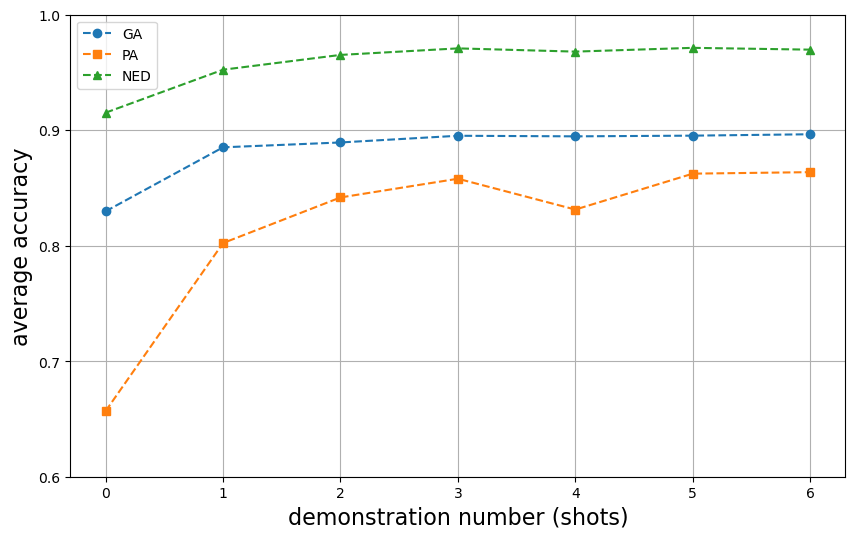

In [20]:
import matplotlib.pyplot as plt

data = '''0.8298	0.6569	0.91518
0.8852	0.8023	0.95239
0.8894	0.8418	0.9652
0.8952	0.858	0.97086
0.8947	0.8313	0.96806
0.8953	0.8624	0.97133
0.8965	0.8637	0.96976'''

data2 = '''0.97	0.873	0.965
0.943	0.918	0.971
0.978	0.9	0.966
0.963	0.932	0.98
0.96	0.893	0.968
0.978	0.9	0.966
0.963	0.932	0.98
'''

accuracy_metric1 = []
accuracy_metric2 = []
accuracy_metric3 = []

data_list = data.replace('\t', ' ').replace('\n', ' ').strip().split(' ')
for index, data_item in enumerate(data_list):
    if index % 3 == 0:
        accuracy_metric1.append(float(data_item))
    elif index % 3 == 1:
        accuracy_metric2.append(float(data_item))
    else:
        accuracy_metric3.append(float(data_item))



# Data for the plot
shots = [0, 1, 2, 3, 4, 5 ,6]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(shots, accuracy_metric1, marker='o', linestyle='--', label='GA')
plt.plot(shots, accuracy_metric2, marker='s', linestyle='--', label='PA')
plt.plot(shots, accuracy_metric3, marker='^', linestyle='--', label='NED')

# Adding labels and title
plt.xlabel('demonstration number (shots)', fontsize=16)
plt.ylabel('average accuracy', fontsize=16)
plt.title('')
plt.xticks(shots)
plt.yticks([i/10 for i in range(5, 11)])
plt.ylim(0.6, 1)

# Adding a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('accuracy_vs_shots.pdf')
plt.show()